In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv('mcdonalds.csv')

In [3]:
data

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [4]:
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [5]:
data_dummy = pd.get_dummies(data, drop_first=True)

<AxesSubplot:>

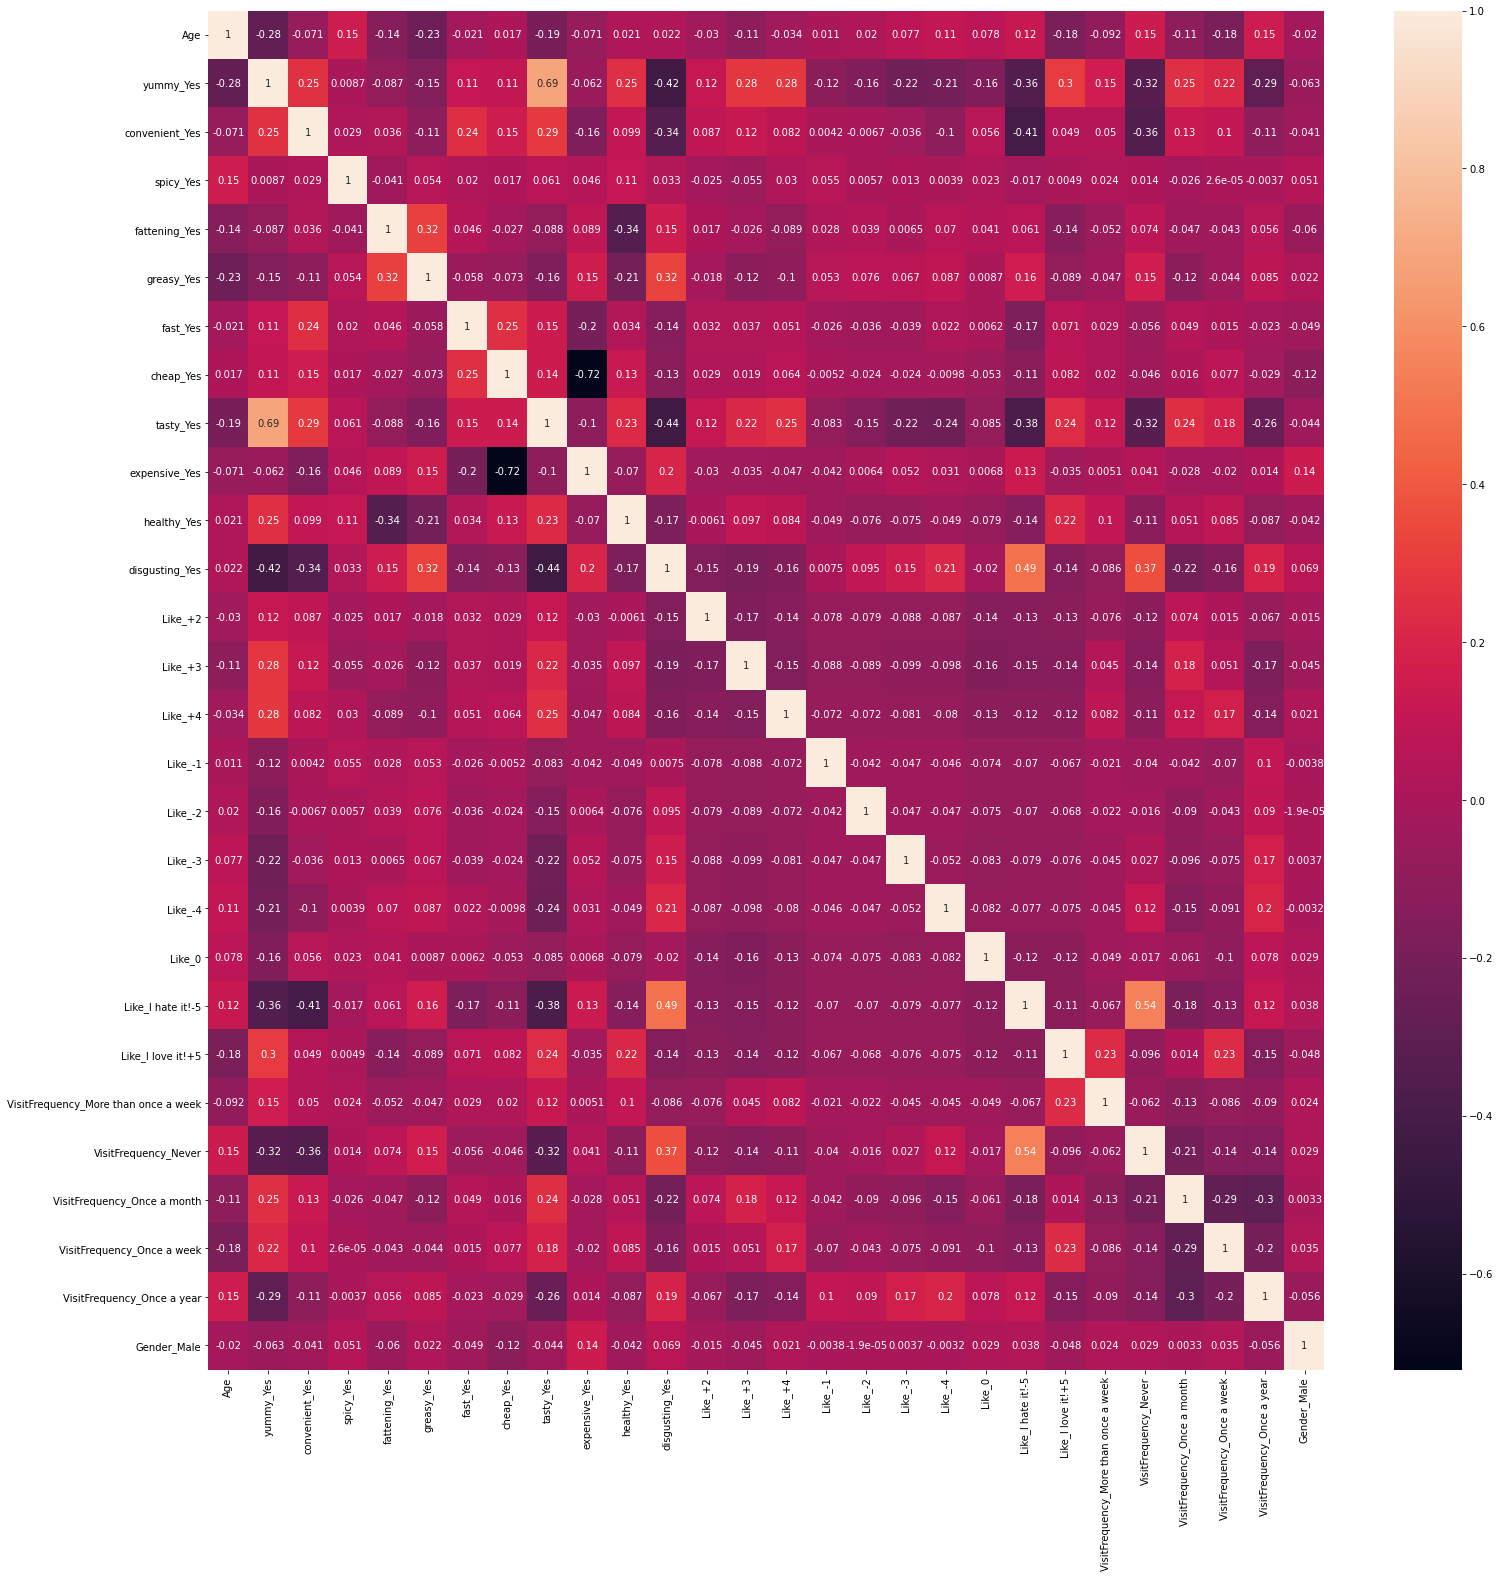

In [6]:
plt.figure(figsize = (25,25))
sns.heatmap(data_dummy.corr(), annot = True)

In [7]:
data_dummy

,Age,yummy_Yes,convenient_Yes,spicy_Yes,fattening_Yes,greasy_Yes,fast_Yes,cheap_Yes,tasty_Yes,expensive_Yes,...,Like_-4,Like_0,Like_I hate it!-5,Like_I love it!+5,VisitFrequency_More than once a week,VisitFrequency_Never,VisitFrequency_Once a month,VisitFrequency_Once a week,VisitFrequency_Once a year,Gender_Male
0,61,0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,51,1,1,0,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,62,0,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,69,1,1,0,1,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,49,0,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,47,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1
1449,36,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1450,52,1,1,0,1,0,1,0,1,1,...,0,0,0,0,0,0,1,0,0,0
1451,41,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
wcss = []
data_model = data_dummy.drop(['Gender_Male', 'Age'], axis=1)
for k in range(1, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data_model)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'The ELBOW curve for determining best segmentation')

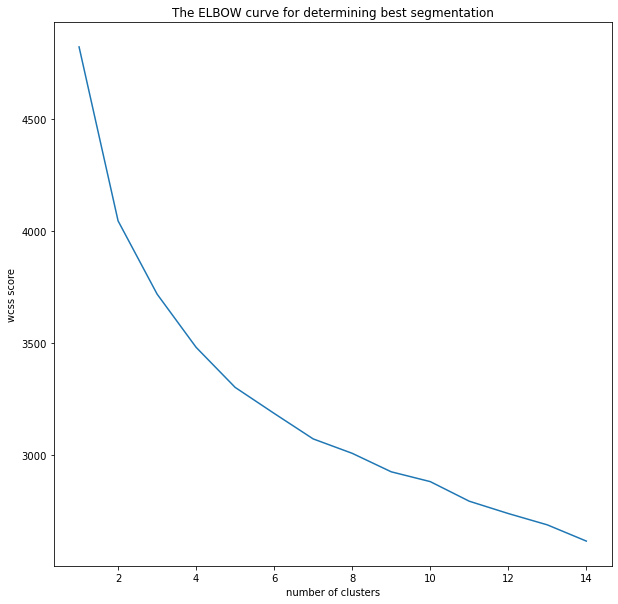

In [9]:
plt.figure(figsize = (10,10))
plt.plot(range(1, 15), wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss score')
plt.title('The ELBOW curve for determining best segmentation')

In [13]:
pca = PCA(n_components=11)
pc = pca.fit_transform(data_dummy)

In [15]:
pf = pd.DataFrame(data = pc)

In [16]:
pf

,0,1,2,3,4,5,6,7,8,9,10
0,-16.406561,0.313632,-0.125578,-0.250921,0.175018,0.565910,-0.296652,-0.277604,-0.100692,0.237548,-0.019923
1,-6.381690,-0.304971,0.159053,-0.672281,0.302162,-0.746239,-0.231557,0.003839,-0.435459,0.026800,0.669503
2,-17.393442,0.154983,0.690664,-0.567496,0.560074,-0.359715,0.171132,0.654511,0.071256,0.738843,-0.088823
3,-24.376995,-0.478689,-0.384954,-0.305043,0.657536,-1.190185,0.426897,-0.451894,-0.270493,-0.332074,-0.449546
4,-4.397310,0.033966,-0.414461,0.356206,-0.920712,-0.136200,0.024295,0.576835,-0.379821,0.959490,0.754648
...,...,...,...,...,...,...,...,...,...,...,...
1448,-2.405979,1.799383,0.450454,0.236675,0.075687,-0.053634,0.076710,0.301694,0.213564,-0.465538,0.203459
1449,8.608858,-0.923575,-0.308363,0.089374,0.849496,0.277717,0.133722,-0.077336,-0.513064,0.251721,0.824058
1450,-7.383699,-0.641559,1.122696,-0.843790,-0.324767,0.339640,0.022407,-0.472562,0.536075,-0.155729,0.052901
1451,3.602859,-1.034884,-0.069520,1.002315,0.218972,0.269102,0.394110,0.513120,-0.161483,-0.209896,-0.258449


In [24]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = data_dummy.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
Age,-0.999833,-0.007868,0.006149,-0.003844,0.000671,-0.012510,0.001649,-0.002005,0.001053,0.001280,0.000548
yummy_Yes,0.009869,-0.443686,0.217277,-0.092357,0.134530,-0.279289,0.142576,-0.002705,0.035669,-0.298207,0.047545
convenient_Yes,0.001441,-0.147951,-0.010267,-0.024065,-0.019101,-0.059698,-0.245064,0.044996,0.073079,0.165421,-0.049241
spicy_Yes,-0.002995,-0.009536,0.026345,0.030523,0.034540,-0.123302,0.070882,0.177220,0.002506,0.072879,-0.085860
fattening_Yes,0.003325,0.110282,-0.049866,-0.198786,-0.072494,-0.259384,-0.202634,-0.230165,0.043009,-0.116771,-0.022798
greasy_Yes,0.008204,0.294724,-0.088961,-0.251371,-0.043112,-0.748250,0.073848,0.231647,0.091637,0.321844,0.003685
fast_Yes,0.000435,-0.089212,-0.104073,-0.001640,-0.031776,-0.058590,-0.101337,0.016205,0.021311,0.007179,-0.072779
cheap_Yes,-0.000584,-0.246994,-0.632369,0.147095,-0.102988,-0.135761,0.116733,0.032458,0.013969,-0.047391,0.021411
tasty_Yes,0.006569,-0.434164,0.176973,-0.069388,0.091546,-0.310903,0.012460,0.079056,0.011042,-0.298531,-0.046711


<AxesSubplot:ylabel='variable'>

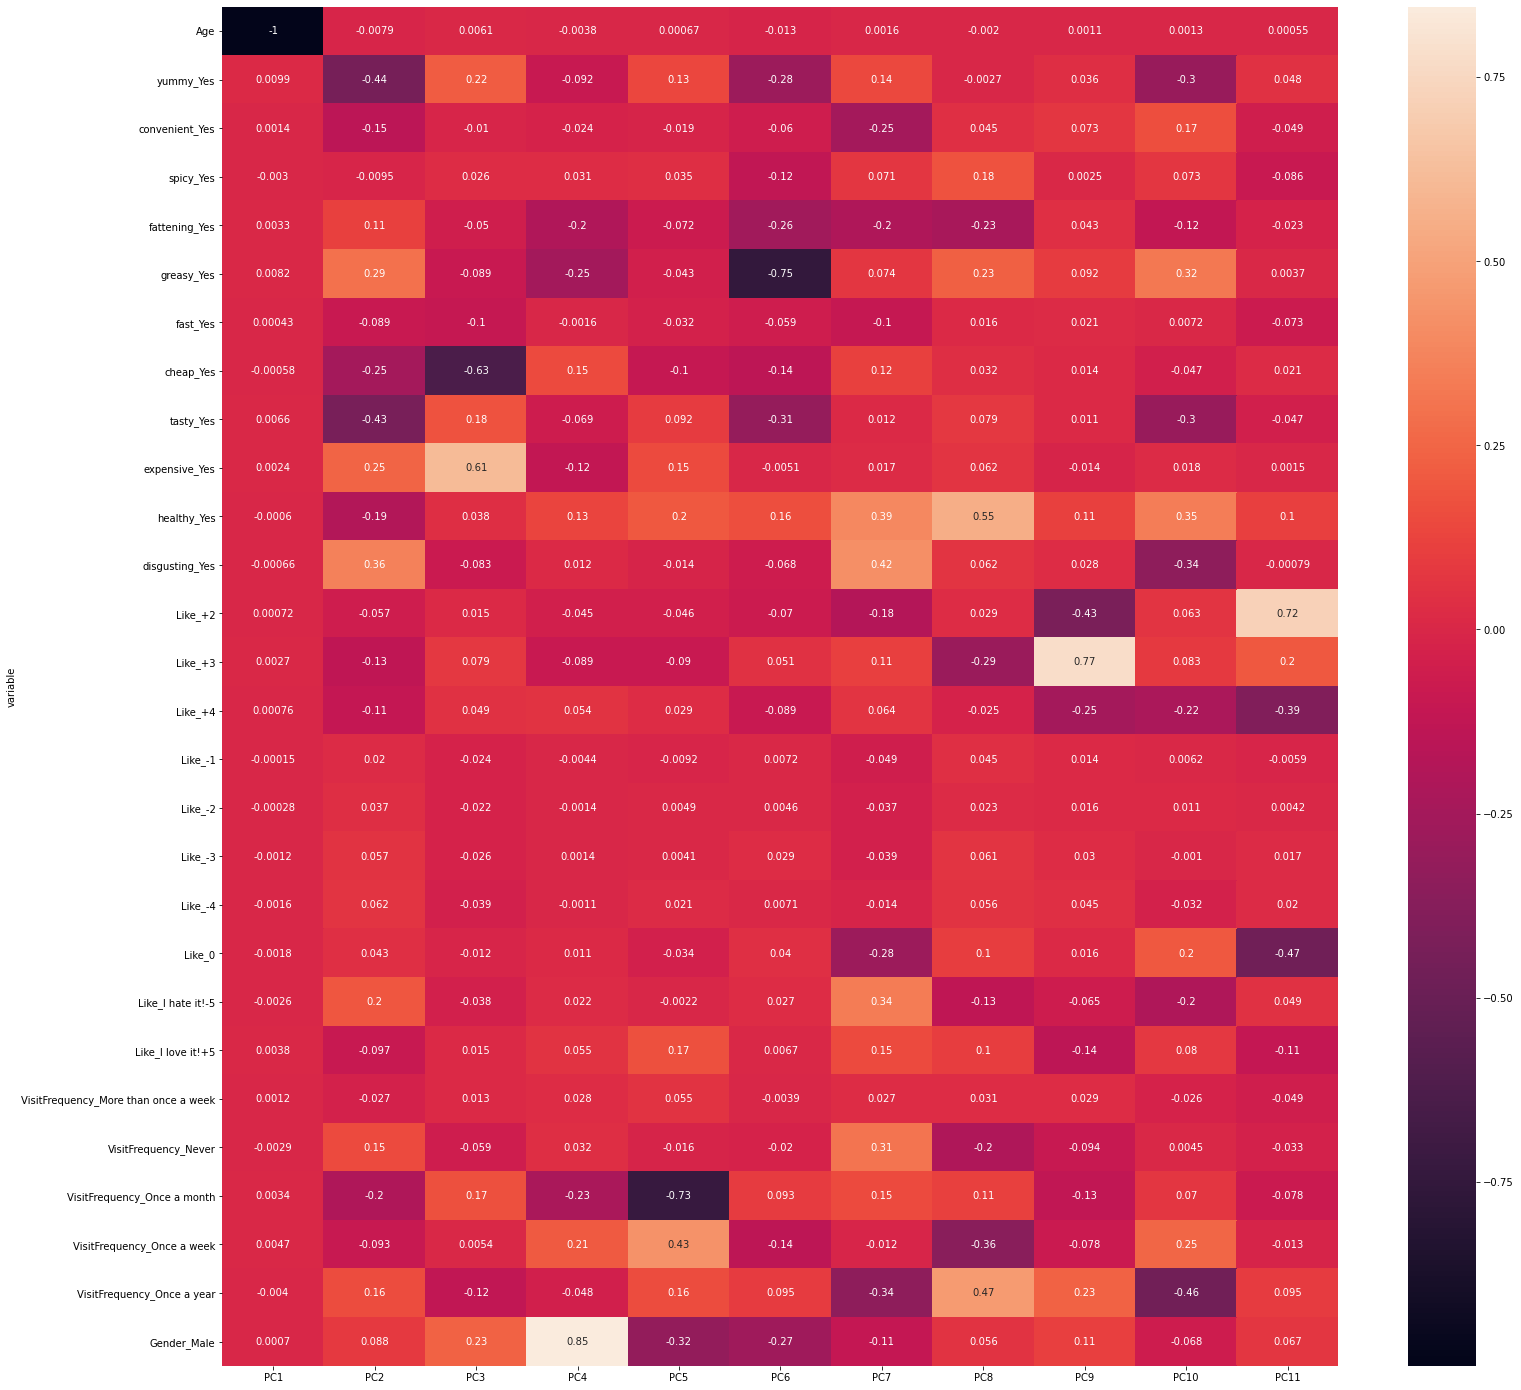

In [25]:
plt.figure(figsize = (25,25))
sns.heatmap(loadings_df, annot=True)

In [34]:
df = pca.fit_transform(data_dummy)

In [35]:
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 

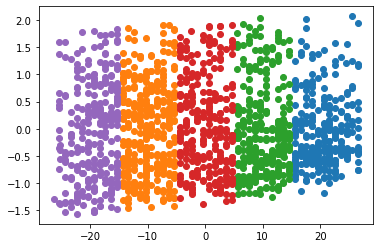

In [36]:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)